# Unzip Dataset Archive

Run once when you start using this notebook. Make sure cleaned_project_data.zip is in the local runtime storage.

In [2]:
!unzip cleaned_project_data.zip

Archive:  cleaned_project_data.zip
  inflating: content/covid_deaths_by_state.csv  
  inflating: content/divorce_rate_by_state.csv  
  inflating: content/drug_od_deaths_by_state.csv  
  inflating: content/earnings_by_state.csv  
  inflating: content/fertility_rate_by_state.csv  
  inflating: content/firearm_deaths_by_state.csv  
  inflating: content/gdp_by_state.csv  
  inflating: content/gun_policy_by_state.csv  
  inflating: content/homicides_by_state_cdc.csv  
  inflating: content/homicides_by_state_fbi.csv  
  inflating: content/infant_mortality_by_state.csv  
  inflating: content/life_expectancy_by_state.csv  
  inflating: content/marriage_rate_by_state.csv  
  inflating: content/mass_shootings.csv  
  inflating: content/teen_birth_rate_by_state.csv  
  inflating: content/unemployment_rate_by_state.csv  


# Import Required Libraries

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Datasets

In [68]:
homicides_cdc = pd.read_csv('content/homicides_by_state_cdc.csv').rename(columns={'Death Rate': 'Homicides Death Rate'})
homicides_fbi = pd.read_csv('content/homicides_by_state_fbi.csv')
gun_policy = pd.read_csv('content/gun_policy_by_state.csv')
gdp = pd.read_csv('content/gdp_by_state.csv').rename(columns={'2019': 'GDP_2019'})
firearm_deaths = pd.read_csv('content/firearm_deaths_by_state.csv').rename(columns={'Death Rate': 'Firearm Death Rate'})
fertility_rate = pd.read_csv('content/fertility_rate_by_state.csv')
earnings = pd.read_csv('content/earnings_by_state.csv').rename(columns={'2019': 'Earnings_2019'})
drug_od = pd.read_csv('content/drug_od_deaths_by_state.csv').rename(columns={'Death Rate': 'Drug OD Death Rate'})
divorce_rate = pd.read_csv('content/divorce_rate_by_state.csv')
covid_deaths = pd.read_csv('content/covid_deaths_by_state.csv').rename(columns={'Death Rate': 'Covid Death Rate'})
infant_mortality = pd.read_csv('content/infant_mortality_by_state.csv').rename(columns={'Death Rate': 'Infant Death Rate'})
life_expectancy = pd.read_csv('content/life_expectancy_by_state.csv')
marriage_rate = pd.read_csv('content/marriage_rate_by_state.csv')
mass_shootings = pd.read_csv('content/mass_shootings.csv').rename(columns={'location': 'State'})
teen_birth_rate = pd.read_csv('content/teen_birth_rate_by_state.csv')
unemployment_rate = pd.read_csv('content/unemployment_rate_by_state.csv').rename(columns={'2019': 'Unemployment_2019'})

In [69]:
# List of all dataframes for easier merging
dfs = [homicides_cdc, homicides_fbi, gun_policy, gdp, firearm_deaths, fertility_rate, earnings, 
       drug_od, divorce_rate, covid_deaths, infant_mortality, life_expectancy, marriage_rate, 
       mass_shootings, teen_birth_rate, unemployment_rate]

In [70]:
# Merge all dataframes
from functools import reduce
df = reduce(lambda left, right: pd.merge(left, right, on='State'), dfs)

df.head()

,State,Homicides Death Rate,Murders,Non-Firearm,Firearm,Handguns,Rifles,Unknown,Severity Gun Control,GDP_2019,...,Divorce Rate,Covid Death Rate,Infant Death Rate,Years Lived,Marriage Rate,age_of_shooter,Mental Health,weapon_type,Birth Rate_y,Unemployment_2019
0,Alabama,12.8,11.084680,1.196974,2.517412,1.328450,0.084668,0.706416,10,2.721809e+05,...,3.6,34.1,7.71,75.2,6.7,70,No,Handgun,25.6,3.2
1,Arizona,5.9,4.745710,1.746196,2.999514,2.393978,0.084493,0.436549,10,4.339397e+05,...,2.9,16.7,5.43,78.8,5.3,22,Yes,Handgun,18.5,4.8
2,Arkansas,9.4,7.688807,1.797383,5.891423,2.895784,0.332849,2.496366,10,1.576148e+05,...,4.0,34.1,7,75.7,8.4,11,No,Rifle,30.0,3.5
3,California,4.5,4.274779,1.367216,2.907563,1.940072,0.086565,0.814729,100,3.524961e+06,...,NaN,23.2,4.23,80.9,5.7,67,No,Handgun,12.4,4.3
4,California,4.5,4.274779,1.367216,2.907563,1.940072,0.086565,0.814729,100,3.524961e+06,...,NaN,23.2,4.23,80.9,5.7,72,Yes,Rifle,12.4,4.3


<ipython-input-71-2fbc715baf7e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


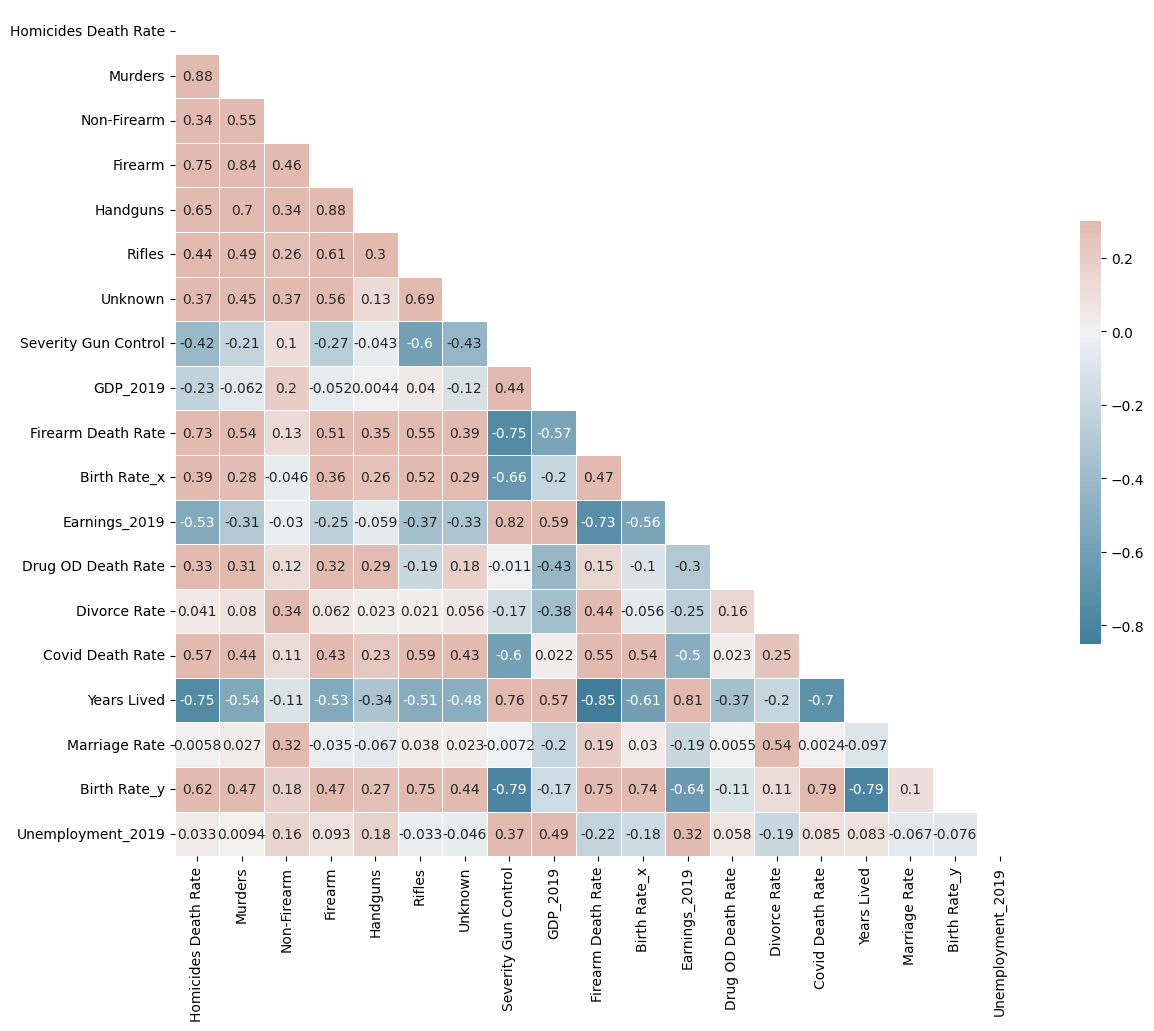

In [71]:
# Correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Set up the matplotlib figure with larger size
f, ax = plt.subplots(figsize=(15, 11))

# Draw the heatmap with annotations
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

#**Murders Count by State.**
*Creating a plot of number of murders in each state, the x-axis will represent the number of murders and the y-axis will represent each state.*

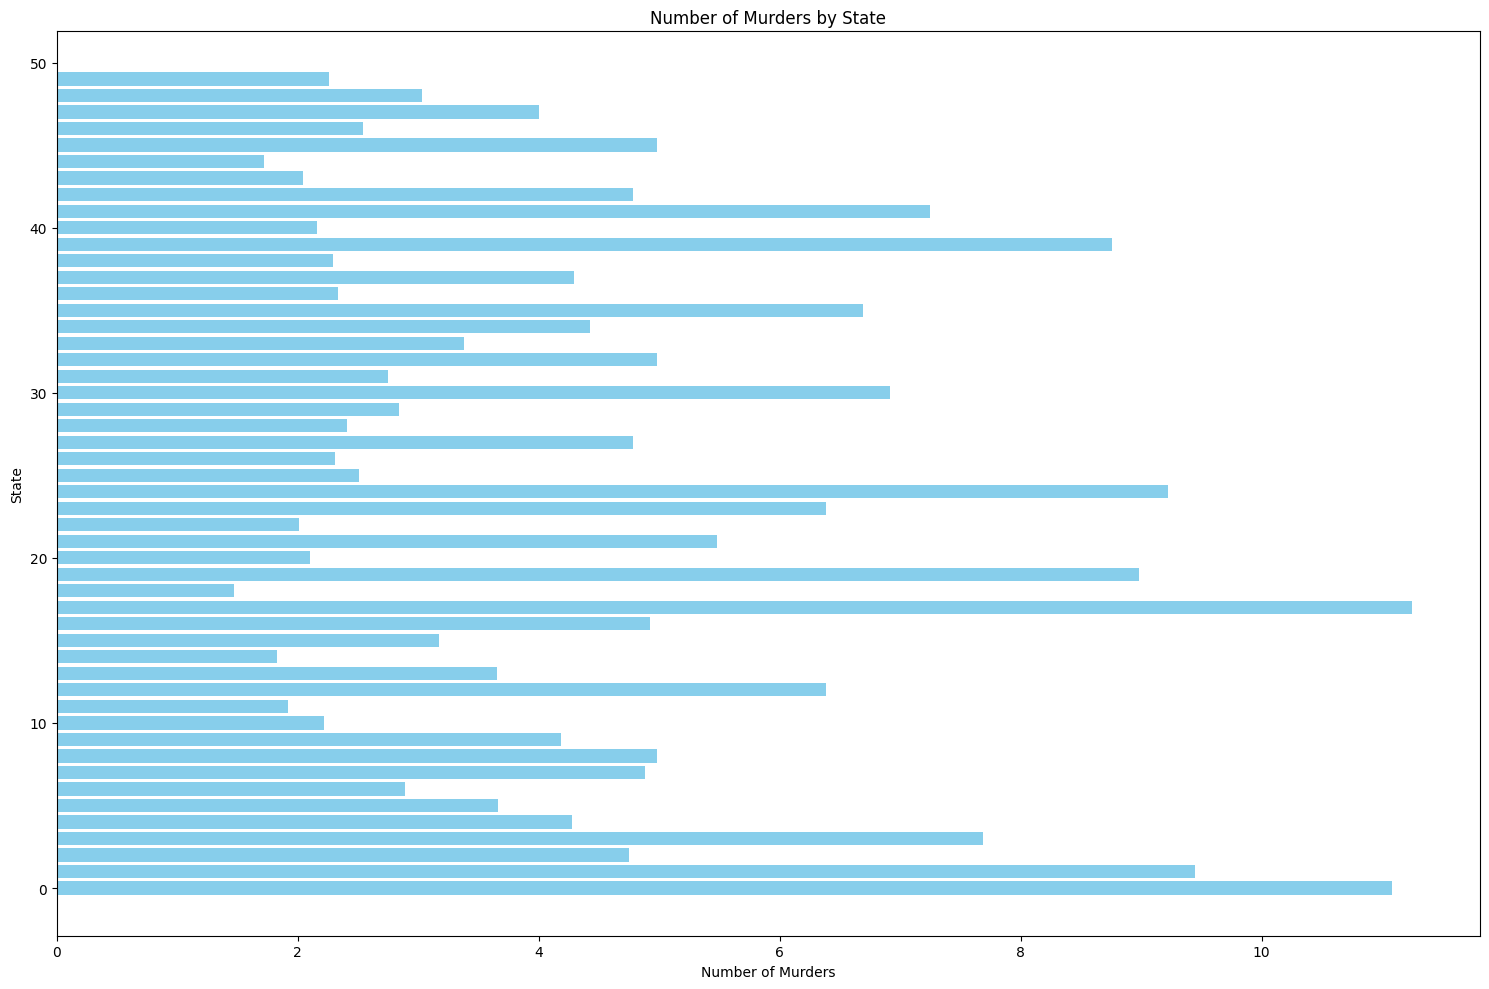

In [72]:
plt.figure(figsize=(15,10))
plt.barh(homicides_fbi.index, homicides_fbi['Murders'], color='skyblue')
plt.xlabel('Number of Murders')
plt.ylabel('State')
plt.title('Number of Murders by State')
plt.tight_layout()
plt.show()

#**State-wise Stacked Representation of Murder Types.**
*Creating a stacked bar chart where each bar represents a state and each segment within the bar represents the breakdown of the types of murders.*

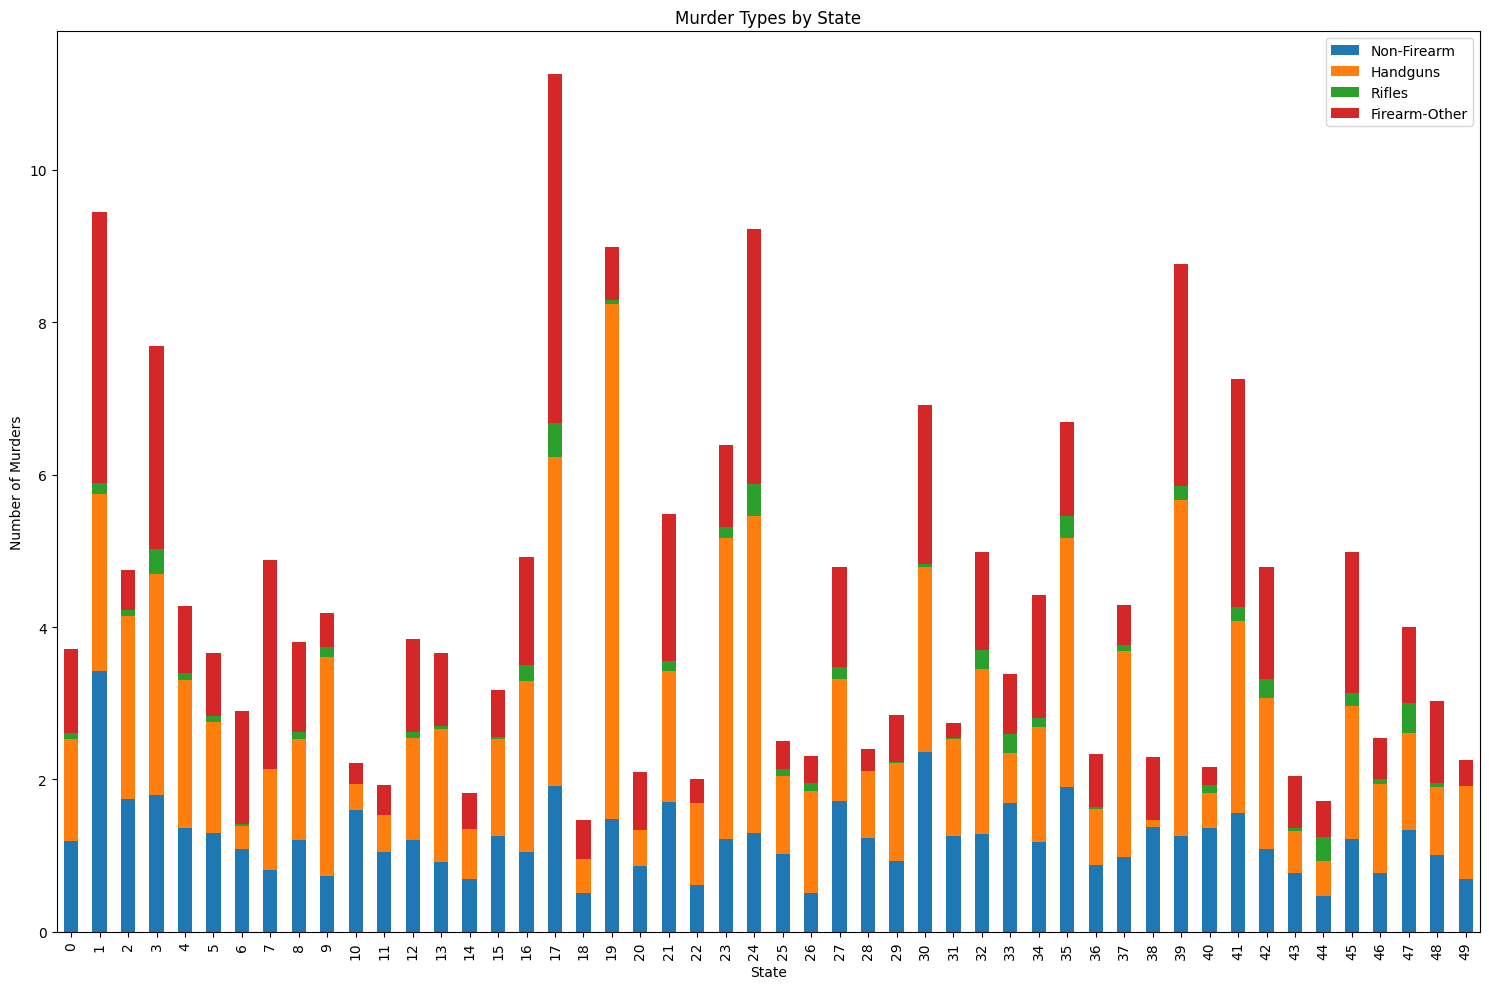

In [73]:
# Set 'State' as index
# homicides_fbi.set_index('State', inplace=True)

# # Create a new column 'Firearm-Other' which is 'Firearm' - 'Handguns' - 'Rifles' to represent other types of firearms
# homicides_fbi[['Firearm', 'Handguns', 'Rifles']] = homicides_fbi[['Firearm', 'Handguns', 'Rifles']].fillna(0)  # Fill NaN values with 0
homicides_fbi['Firearm-Other'] = homicides_fbi['Firearm'] - homicides_fbi['Handguns'] - homicides_fbi['Rifles']

# Plot stacked bar chart
homicides_fbi[['Non-Firearm', 'Handguns', 'Rifles', 'Firearm-Other']].plot(kind='bar', stacked=True, figsize=(15,10))

plt.title('Murder Types by State')
plt.xlabel('State')
plt.ylabel('Number of Murders')

# Rotate x-axis labels
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

#**Gun Deaths (Homicides) and Gun Policy.**
*Visualizing and analyzing the relationship between Gun Deaths (Homicides) and Gun Policy. Using:*


*• From "homicides_by_state_fbi", the 'Firearm' column.*


*• From "gun_policy_by_state", the 'Severity Gun Control' column.*


**1- Data Merging: Merging both dataframes homicides_by_state_fbi and gun_policy_by_state on 'State', using pandas merge function.**

In [74]:
df_gun_deaths_and_policy = pd.merge(homicides_fbi, gun_policy, on='State')

**2- Visualization: Plotting a scatter plot with 'Severity Gun Control' on the x-axis and 'Firearm' (representing gun deaths) on the y-axis.**

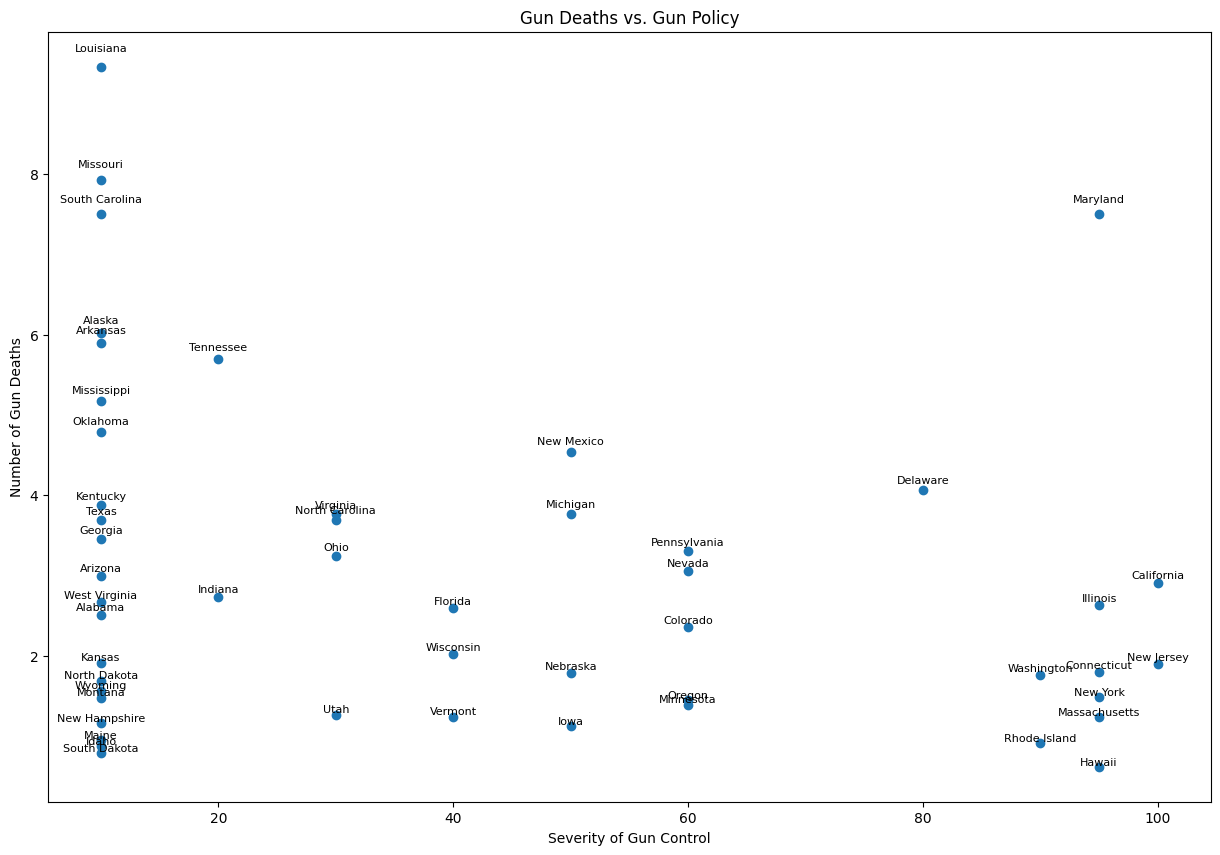

In [75]:
plt.figure(figsize=(15,10))
plt.scatter(df_gun_deaths_and_policy['Severity Gun Control'], df_gun_deaths_and_policy['Firearm'])

# Add labels with adjusted positions
for i in range(len(df_gun_deaths_and_policy)):
    x = df_gun_deaths_and_policy['Severity Gun Control'].iloc[i]
    y = df_gun_deaths_and_policy['Firearm'].iloc[i]
    plt.text(x, y*1.02, df_gun_deaths_and_policy['State'].iloc[i], fontsize=8, ha='center')

plt.title('Gun Deaths vs. Gun Policy')
plt.xlabel('Severity of Gun Control')
plt.ylabel('Number of Gun Deaths')
plt.show()


**3- Statistical Analysis: Computing the Pearson correlation between 'Severity Gun Control' and 'Firearm'.**

In [76]:
correlation = df['Severity Gun Control'].corr(df['Firearm'])
print(f"Correlation between Severity of Gun Control and Gun Deaths: {correlation}")

Correlation between Severity of Gun Control and Gun Deaths: -0.266854929152576


**Comment**

In statistics, the correlation coefficient measures the strength and direction of the relationship between two variables. The value ranges between -1.0 and 1.0. A correlation of -1.0 shows a perfect negative correlation, while a correlation of 1.0 shows a perfect positive correlation. A correlation of 0.0 shows no linear relationship between the variables.

The negative sign of the correlation coefficient indicates that the two variables tend to move in opposite directions. In this case, as the Severity of Gun Control increases (meaning stricter gun control policies), the number of Gun Deaths tends to decrease, and vice versa.

However, the correlation value of -0.2668 is relatively close to 0, which suggests a weak negative relationship between the Severity of Gun Control and Gun Deaths. Therefore, while there is a tendency for states with more severe gun control policies to have fewer gun deaths, the relationship is not strong.

#**Gun Deaths (Homicides) and Economics.**
*Visualizing and analyzing the relationship between Gun Deaths (Homicides) and Economis. Using:*


*• From "homicides_by_state_fbi", the 'Firearm' column.*


*• From "gdp_by_state" and "earnings_by_state", the '2019' column.*


**1- Data Merging: Merging both the homicides_by_state_fbi dataframe with gdp_by_state and earnings_by_state dataframes on 'State'.**

In [77]:
df_gun_deaths_and_economics = pd.merge(homicides_fbi, gdp, on='State')
df_gun_deaths_and_economics = pd.merge(df_gun_deaths_and_economics, earnings, on='State', suffixes=('_gdp', '_earnings'))

**2- Visualization: Plotting two scatter plots, one with 'GDP_2019' on the x-axis and 'Firearm' on the y-axis, and another with 'Earnings_2019' on the x-axis and 'Firearm' on the y-axis.**

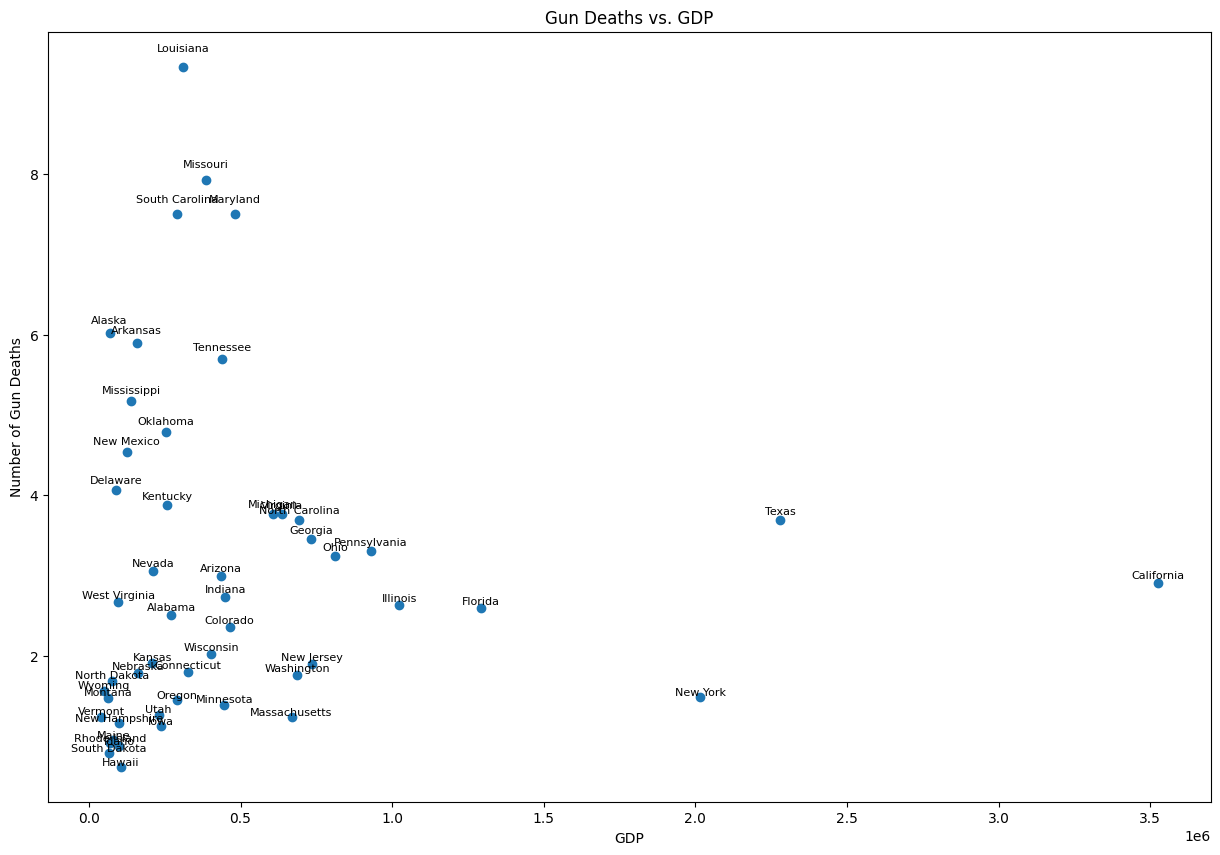

In [78]:
plt.figure(figsize=(15,10))

# Plot for GDP
plt.scatter(df_gun_deaths_and_economics['GDP_2019'], df_gun_deaths_and_economics['Firearm'])
# Add labels with adjusted positions
for i in range(len(df_gun_deaths_and_economics)):
    x = df_gun_deaths_and_economics['GDP_2019'].iloc[i]
    y = df_gun_deaths_and_economics['Firearm'].iloc[i]
    plt.text(x, y*1.02, df_gun_deaths_and_economics['State'].iloc[i], fontsize=8, ha='center')
plt.title('Gun Deaths vs. GDP')
plt.xlabel('GDP')
plt.ylabel('Number of Gun Deaths')

plt.show()

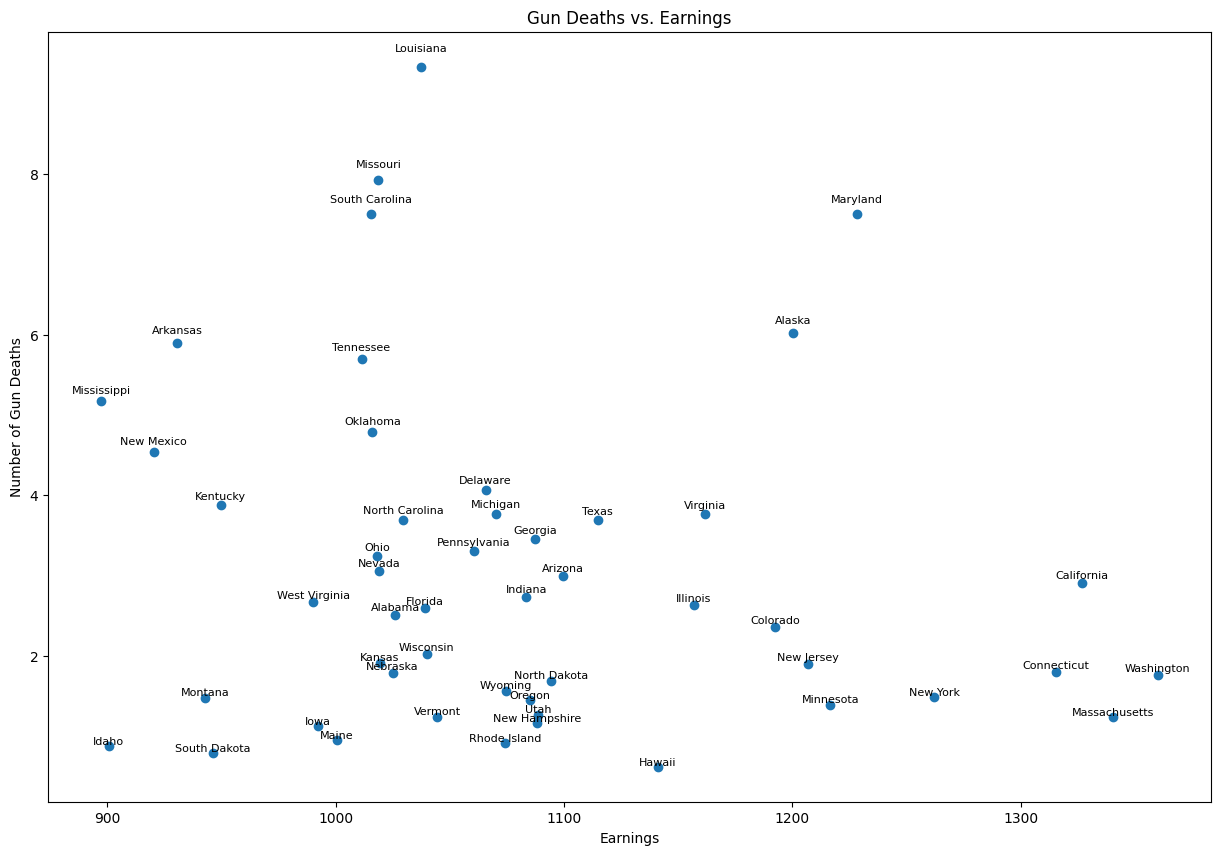

In [79]:
plt.figure(figsize=(15,10))

# Plot for Earnings
plt.scatter(df_gun_deaths_and_economics['Earnings_2019'], df_gun_deaths_and_economics['Firearm'])
# Add labels with adjusted positions
for i in range(len(df_gun_deaths_and_economics)):
    x = df_gun_deaths_and_economics['Earnings_2019'].iloc[i]
    y = df_gun_deaths_and_economics['Firearm'].iloc[i]
    plt.text(x, y*1.02, df_gun_deaths_and_economics['State'].iloc[i], fontsize=8, ha='center')
plt.title('Gun Deaths vs. Earnings')
plt.xlabel('Earnings')
plt.ylabel('Number of Gun Deaths')

plt.show()

**3- Statistical Analysis: Computing the Pearson correlation between 'gdp'/'earnings' and 'Firearm'.**

In [80]:
correlation_gdp = df_gun_deaths_and_economics['GDP_2019'].corr(df_gun_deaths_and_economics['Firearm'])
correlation_earnings = df_gun_deaths_and_economics['Earnings_2019'].corr(df_gun_deaths_and_economics['Firearm'])

print(f"Correlation between GDP and Gun Deaths: {correlation_gdp}")
print(f"Correlation between Earnings and Gun Deaths: {correlation_earnings}")


Correlation between GDP and Gun Deaths: 0.013653364936535002
Correlation between Earnings and Gun Deaths: -0.15992482034399955


**Comment**

The correlation between GDP and Gun Deaths is approximately 0.0137, which is very close to zero. This indicates that there is very little linear relationship between a state's GDP and the number of gun-related deaths. In other words, an increase in GDP does not strongly correspond with either an increase or decrease in gun deaths.

The correlation between Earnings and Gun Deaths is approximately -0.16, which indicates a weak negative relationship. This suggests that as average earnings in a state increase, the number of gun deaths tends to decrease slightly.

#**Gun Deaths (Homicides) and Mental Health.**
*Visualizing and analyzing the relationship between Gun Deaths (Homicides) and Mental Health. Using:*


*• From "homicides_fbi", the 'Firearm' column.*


*• From "drug_od", the 'Death Rate' column as a parallel to mental health.*


**1-Data Merging: Merging both the homicides_by_state_fbi dataframe with drug_od_deaths_by_state dataframe on 'State'.**

In [81]:
df_gun_deaths_and_mental_health = pd.merge(homicides_fbi, drug_od, on='State')


**2- Visualization: Plotting a scatter plot, 'Drug Overdose' on the x-axis and 'Firearm' on the y-axis.**

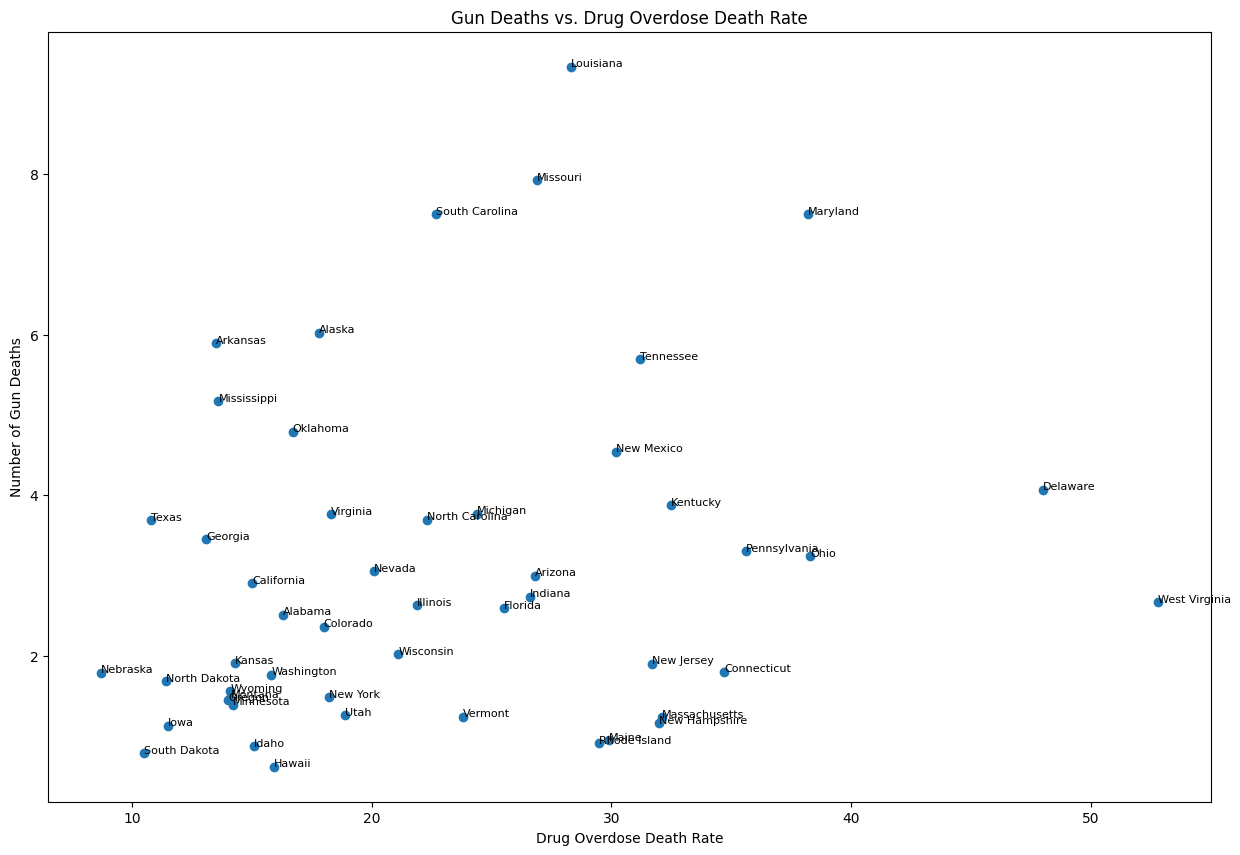

In [82]:
# Create scatter plot
plt.figure(figsize=(15, 10))
plt.scatter(df_gun_deaths_and_mental_health['Drug OD Death Rate'], df_gun_deaths_and_mental_health['Firearm'])
for i in range(len(df_gun_deaths_and_mental_health)):
    plt.text(df_gun_deaths_and_mental_health['Drug OD Death Rate'].iloc[i], df_gun_deaths_and_mental_health['Firearm'].iloc[i], df_gun_deaths_and_mental_health['State'].iloc[i], fontsize=8)
plt.title('Gun Deaths vs. Drug Overdose Death Rate')
plt.xlabel('Drug Overdose Death Rate')
plt.ylabel('Number of Gun Deaths')
plt.show()

**3- Statistical Analysis: Computing the Pearson correlation between 'Drug OD Death Rate' and 'Firearm'.**

In [83]:
correlation = df_gun_deaths_and_mental_health['Drug OD Death Rate'].corr(df_gun_deaths_and_mental_health['Firearm'])
print("Correlation between Drug Overdose Death Rate and Gun Deaths:", correlation)

Correlation between Drug Overdose Death Rate and Gun Deaths: 0.221851275418185


**Comment**

The correlation between the Drug Overdose Death Rate and Gun Deaths is 0.22. This suggests a weak positive relationship between these two variables. In other words, states with higher rates of drug overdose deaths also tend to have a slightly higher number of gun deaths.

#**Mass Shootings and Gun Policy.**
*Visualizing and analyzing the relationship between Mass Shootings and Gun Policy. Using:*


*• From "mass_shootings", new column (count of incidents per state).*


*• From "gun_policy", the 'Severity Gun Control' column.*


**1-Data Merging: Merging both the mass_shootings dataframe with gun_policy dataframe on 'State'.**

In [84]:
# Filter data to only include incidents where weapon_type is Handgun, Rifle or Shotgun
mass_shootings_filtered = mass_shootings[mass_shootings['weapon_type'].isin(['Handgun', 'Rifle', 'Shotgun'])]

# Count number of incidents per state
mass_shootings_state_counts = mass_shootings_filtered['State'].value_counts().reset_index()
mass_shootings_state_counts.columns = ['State', 'Incidents']


df_mass_shootings_and_gun_policy = pd.merge(mass_shootings_state_counts, gun_policy, on='State')

In [85]:
df_mass_shootings_and_gun_policy.head()

,State,Incidents,Severity Gun Control
0,California,25,100
1,Florida,12,40
2,Texas,12,10
3,Colorado,8,60
4,Washington,7,90


**2- Visualization: Plotting a scatter plot, 'Gun' on the x-axis and 'Incidents' on the y-axis.**

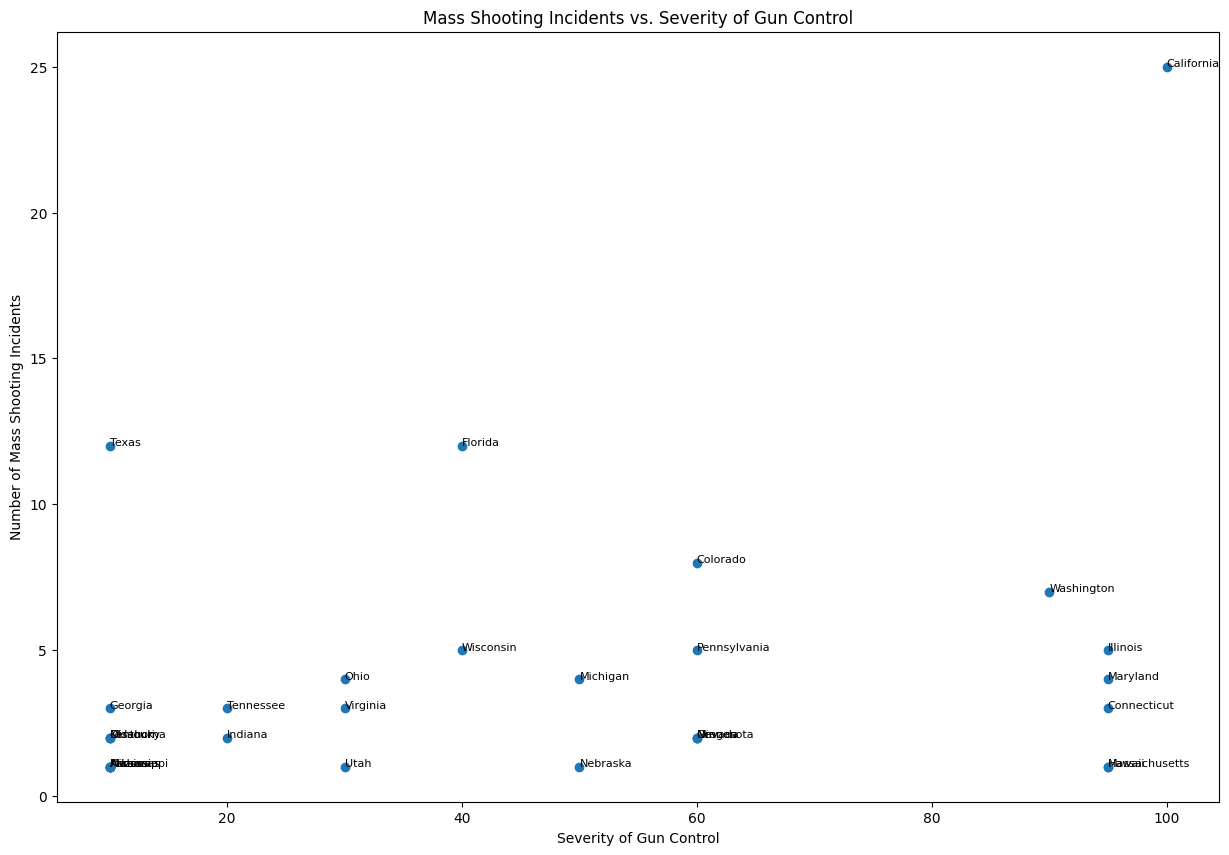

In [86]:
# Create a scatter plot
plt.figure(figsize=(15,10))
plt.scatter(df_mass_shootings_and_gun_policy['Severity Gun Control'], df_mass_shootings_and_gun_policy['Incidents'])
for i in range(len(df_mass_shootings_and_gun_policy)):
  plt.text(df_mass_shootings_and_gun_policy['Severity Gun Control'].iloc[i], df_mass_shootings_and_gun_policy['Incidents'].iloc[i], df_mass_shootings_and_gun_policy['State'].iloc[i], fontsize=8)
plt.title('Mass Shooting Incidents vs. Severity of Gun Control')
plt.xlabel('Severity of Gun Control')
plt.ylabel('Number of Mass Shooting Incidents')
plt.show()


**3- Statistical Analysis: Computing the Pearson correlation between 'Mass Shootings Incidents' and 'Gun Policy'.**

In [87]:
# Calculate correlation
correlation = df_mass_shootings_and_gun_policy['Severity Gun Control'].corr(df_mass_shootings_and_gun_policy['Incidents'])
print(f"Correlation between Severity of Gun Control and Mass Shooting Incidents: {correlation}")

Correlation between Severity of Gun Control and Mass Shooting Incidents: 0.3187513892437508


**Comment**

 This positive correlation suggests that as the severity of gun control increases, the number of mass shooting incidents tends to increase as well. 

#**Mass Shootings and Economics.**
*Visualizing and analyzing the relationship between Mass Shootings and Economics. Using:*


*• From "mass_shootings", count of incidents per state column.*


*• From "gdp" and "earnings", the '2019' column.*

**1-Data Merging: Merging both the mass_shootings dataframe with gdp and earnings dataframes on 'State'.**

In [88]:
df_mass_shootings = mass_shootings_state_counts.copy()
df_mass_shootings_and_economics = pd.merge(df_mass_shootings, gdp, on='State')
df_mass_shootings_and_economics = pd.merge(df_mass_shootings_and_economics, earnings, on='State', suffixes=('_gdp', '_earnings'))

**Visualization: Plotting a scatter plot, 'GDP' and 'Earnings' on the x-axes and 'Incidents' on the y-axis.**

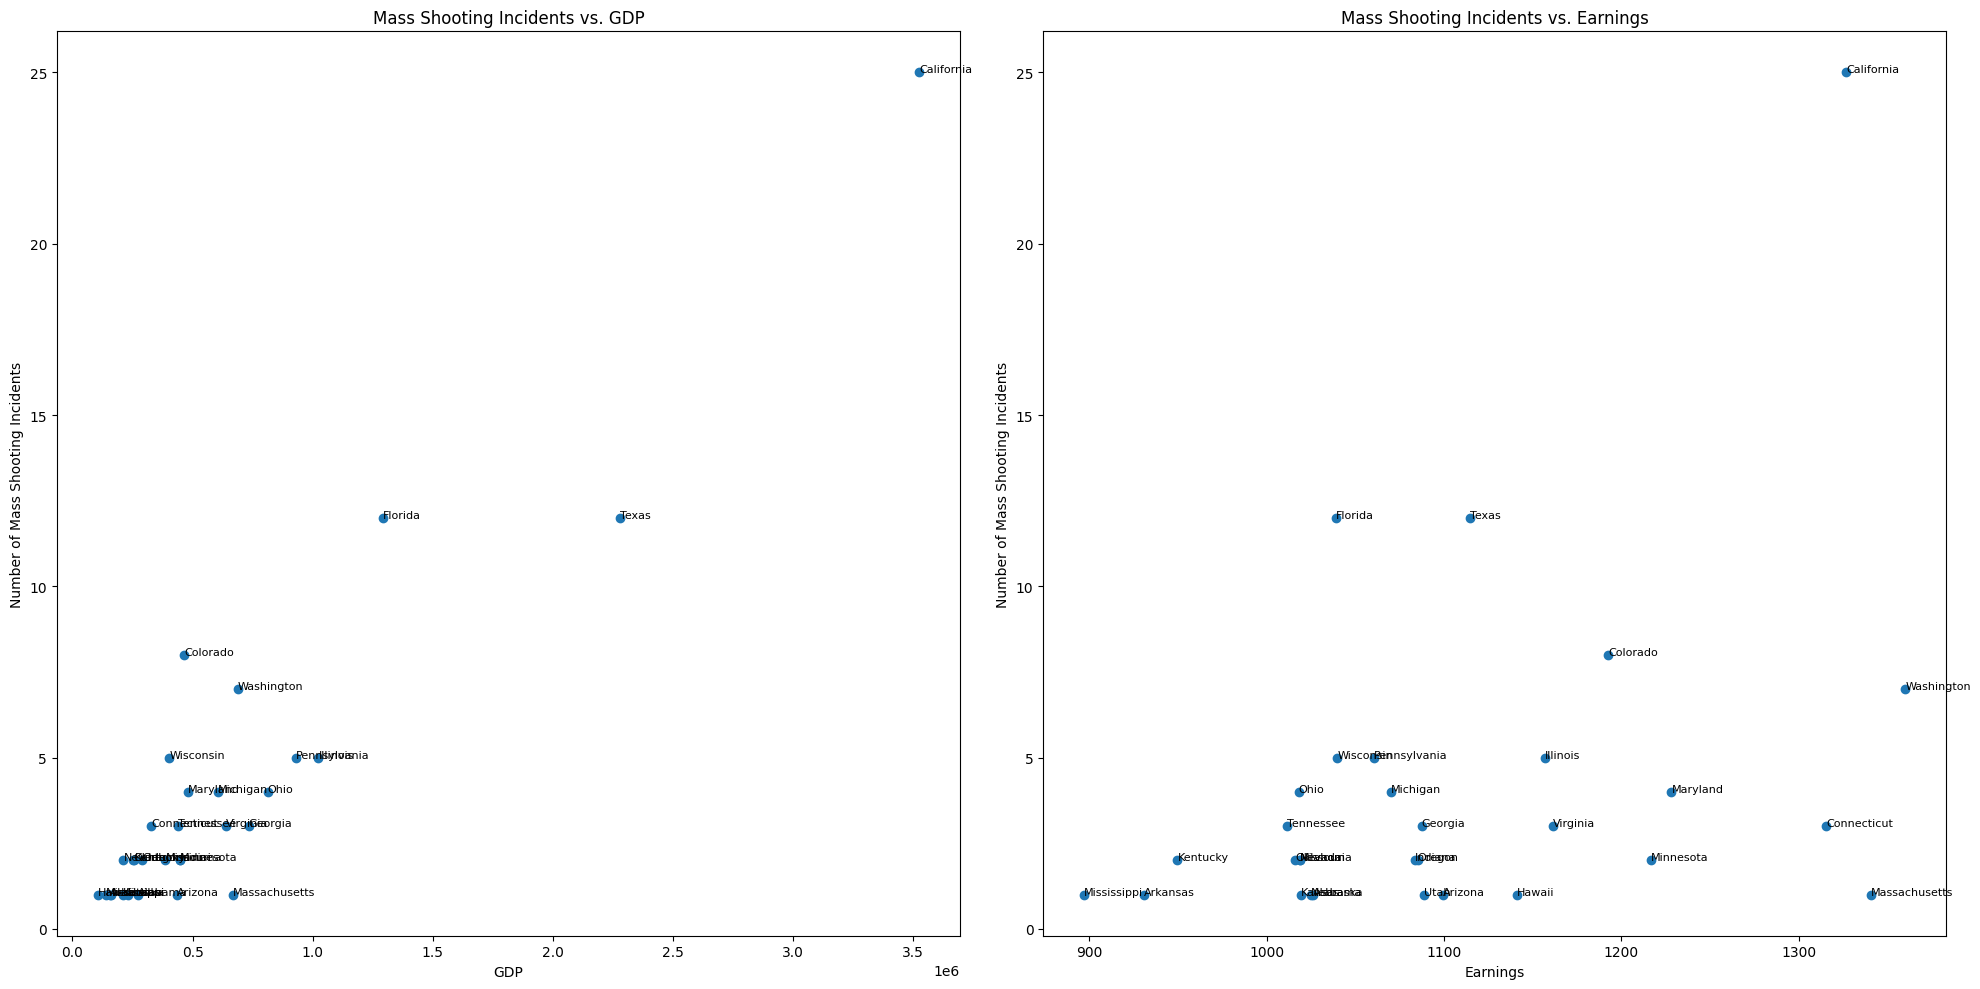

In [89]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# GDP
axs[0].scatter(df_mass_shootings_and_economics['GDP_2019'], df_mass_shootings_and_economics['Incidents'])
for i in range(len(df_mass_shootings_and_economics)):
  axs[0].text(df_mass_shootings_and_economics['GDP_2019'].iloc[i], df_mass_shootings_and_economics['Incidents'].iloc[i], df_mass_shootings_and_economics['State'].iloc[i], fontsize=8)
axs[0].set_title('Mass Shooting Incidents vs. GDP')
axs[0].set_xlabel('GDP')
axs[0].set_ylabel('Number of Mass Shooting Incidents')

# Earnings
axs[1].scatter(df_mass_shootings_and_economics['Earnings_2019'], df_mass_shootings_and_economics['Incidents'])
for i in range(len(df_mass_shootings_and_economics)):
  axs[1].text(df_mass_shootings_and_economics['Earnings_2019'].iloc[i], df_mass_shootings_and_economics['Incidents'].iloc[i], df_mass_shootings_and_economics['State'].iloc[i], fontsize=8)
axs[1].set_title('Mass Shooting Incidents vs. Earnings')
axs[1].set_xlabel('Earnings')
axs[1].set_ylabel('Number of Mass Shooting Incidents')

plt.tight_layout()
plt.show()

**3- Statistical Analysis: Computing the Pearson correlation between 'Mass Shootings Incidents' and 'GDP' and 'Earnings'.**


In [90]:
# Calculate correlation
correlation_gdp = df_mass_shootings_and_economics['GDP_2019'].corr(df_mass_shootings_and_economics['Incidents'])
correlation_earnings = df_mass_shootings_and_economics['Earnings_2019'].corr(df_mass_shootings_and_economics['Incidents'])
print(f"Correlation between GDP and Mass Shooting Incidents: {correlation_gdp}")
print(f"Correlation between Earnings and Mass Shooting Incidents: {correlation_earnings}")


Correlation between GDP and Mass Shooting Incidents: 0.933307546003658
Correlation between Earnings and Mass Shooting Incidents: 0.39899422655879835


**Comment**
The correlation between GDP and mass shooting incidents is approximately 0.933. This is a very high positive correlation, suggesting a strong linear relationship between a state's GDP and the number of mass shooting incidents that occur there. In other words, as the GDP of a state increases, the number of mass shootings tends to increase as well.

The correlation between earnings and mass shooting incidents is approximately 0.399. This is a moderate positive correlation, suggesting that there is a relationship between a state's average earnings and the number of mass shooting incidents, but the relationship is not as strong as that seen with GDP. That is, as the average earnings in a state increase, there tends to be an increase in mass shootings, but other factors likely also play a significant role.

#**Mass Shootings and Mental Health.**
*Visualizing and analyzing the relationship between Mass Shootings and Mental Health. Using:*

*• From "mass_shootings", column count of incidents per state.*


*• From "mass_shootings", 'Mental Health' column.*

**1-Data Processing: Grouping the 'mass_shootings' dataframe by 'State' and 'Mental Health' to count the number of incidents.**

In [91]:
df_mass_shootings_and_mental_health = mass_shootings.groupby(['State', 'Mental Health']).size().reset_index(name='Incidents')
# Replace 0.0 and 1.0 with 'No' and 'Yes' respectively
df_mass_shootings_and_mental_health['Mental Health'] = df_mass_shootings_and_mental_health['Mental Health'].replace({0.0: 'No', 1.0: 'Yes'})
df_mass_shootings_and_mental_health.head()

,State,Mental Health,Incidents
0,Alabama,No,1
1,Arizona,Yes,1
2,Arkansas,No,1
3,California,No,11
4,California,Unknown,1


**2-Data Pivot: Converting 'Mental Health' column from row to column, to have 'Yes' and 'No' as separate columns.**

In [92]:
df_mass_shootings_and_mental_health_pivot = df_mass_shootings_and_mental_health.pivot(index='State', columns='Mental Health', values='Incidents').reset_index().fillna(0)
df_mass_shootings_and_mental_health_pivot.head()

Mental Health,State,No,Unknown,Yes
0,Alabama,1.0,0.0,0.0
1,Arizona,0.0,0.0,1.0
2,Arkansas,1.0,0.0,0.0
3,California,11.0,1.0,13.0
4,Carolina,4.0,0.0,1.0


**3- Visualization: Plotting a stacked bar chart, where each bar represents a state and each segment within the bar represents the count of incidents with and without mental health issues.**


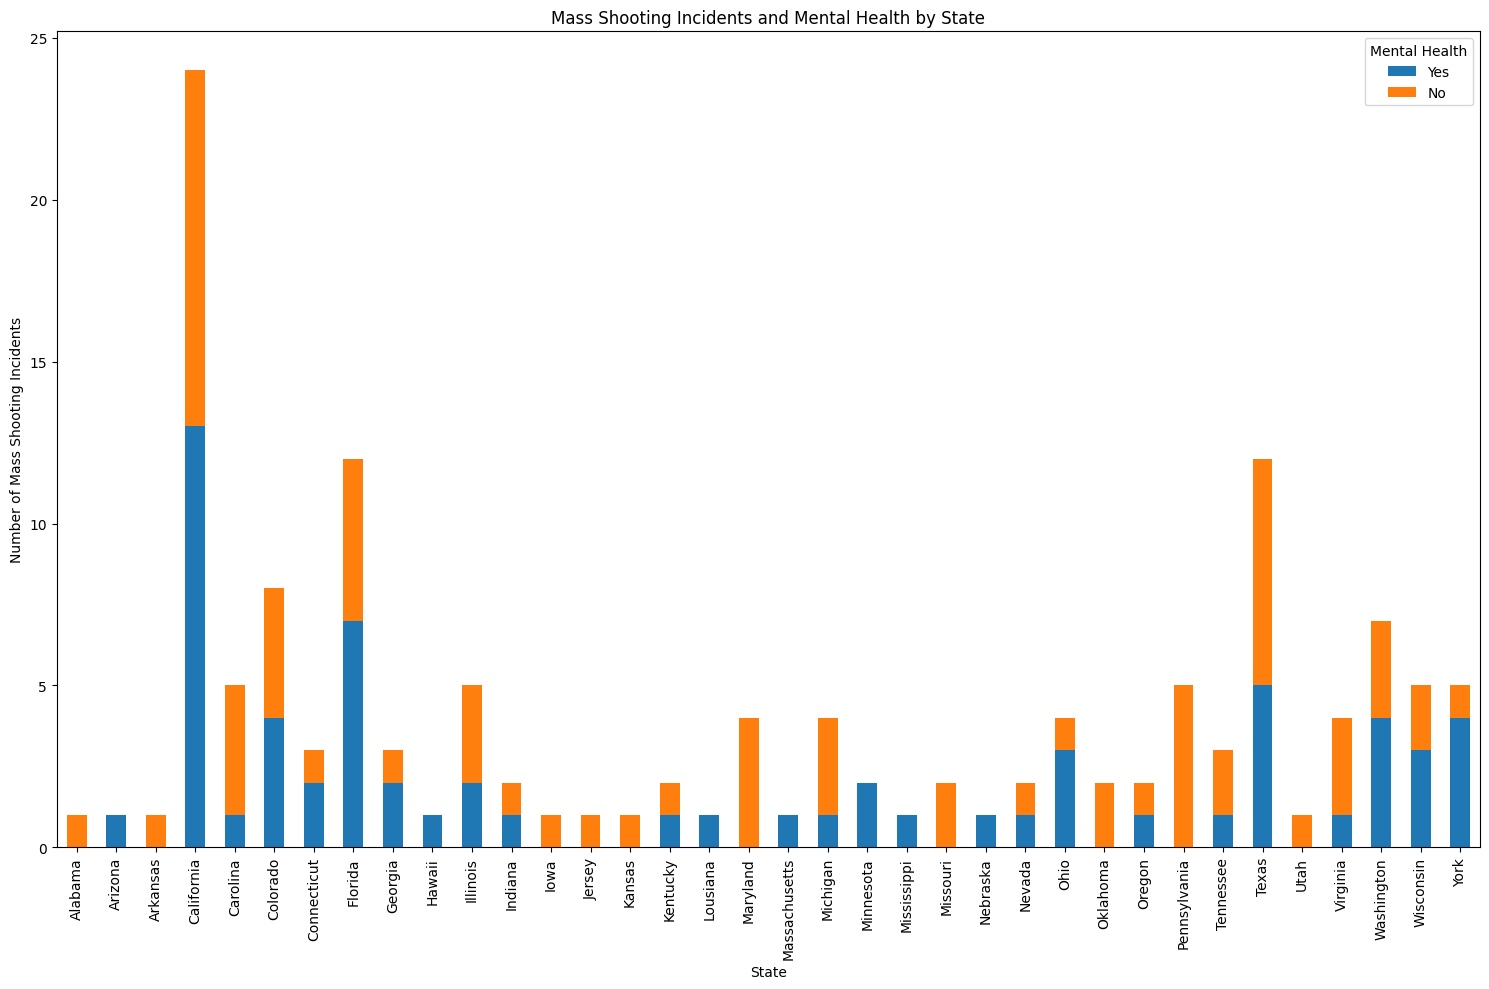

In [93]:
df_mass_shootings_and_mental_health_pivot.set_index('State')[['Yes', 'No']].plot(kind='bar', stacked=True, figsize=(15,10))
plt.title('Mass Shooting Incidents and Mental Health by State')
plt.xlabel('State')
plt.ylabel('Number of Mass Shooting Incidents')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


**Visualization: Plotting a scatter plot, 'Mental Health'on the x-axis and 'Incidents' on the y-axis.**

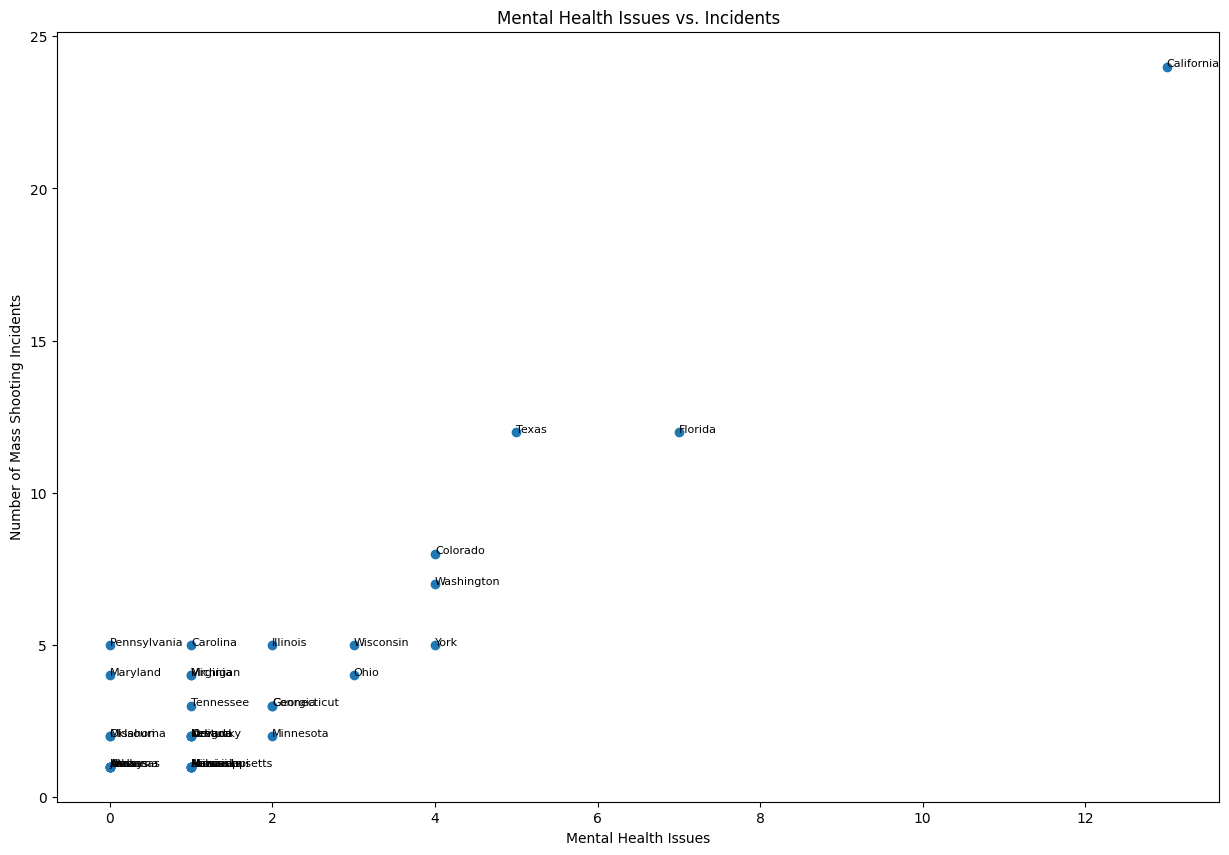

In [94]:
# Create a scatter plot
plt.figure(figsize=(15,10))
incidents = (df_mass_shootings_and_mental_health_pivot['No']+df_mass_shootings_and_mental_health_pivot['Yes'])
plt.scatter(df_mass_shootings_and_mental_health_pivot['Yes'], incidents)
for i in range(len(df_mass_shootings_and_mental_health_pivot)):
  plt.text(df_mass_shootings_and_mental_health_pivot['Yes'].iloc[i], incidents.iloc[i], df_mass_shootings_and_mental_health_pivot['State'].iloc[i], fontsize=8)
plt.title('Mental Health Issues vs. Incidents')
plt.xlabel('Mental Health Issues')
plt.ylabel('Number of Mass Shooting Incidents')
plt.show()


**4- Statistical Analysis: Computing the Pearson correlation between 'Incidents with Mental Health Issues' and 'Incidents without Mental Health Issues'.**

In [95]:
# Calculate correlation
correlation = df_mass_shootings_and_mental_health_pivot['Yes'].corr(df_mass_shootings_and_mental_health_pivot['No']+df_mass_shootings_and_mental_health_pivot['Yes'])
print(f"Correlation between Mental Health Issues and Incidents: {correlation}")


Correlation between Mental Health Issues and Incidents: 0.9368233072984948


**Comment**
The correlation between incidents involving mental health issues and the total number of incidents is approximately 0.937. This is a strong positive correlation, suggesting a strong linear relationship between these two variables.

#**Multiple Regression Analysis on Mass Shootings**

*Building a multiple regression model where the response variable is the number of mass shootings incidents, and the explanatory variables are GDP, earnings, mental health issues, severity of gun control.*

In [96]:
# Preparing the dataframe
# Merging the 'mass_shootings_state_count' and 'gdp' dataframes
df = pd.merge(mass_shootings_state_counts[['State', 'Incidents']], 
              gdp[['State', 'GDP_2019']], 
              on='State')

# Merging with the 'earnings' dataframe
df = pd.merge(df, 
              earnings[['State', 'Earnings_2019']], 
              on='State')

# Merging with the 'drug_od' dataframe
df = pd.merge(df, 
              drug_od[['State', 'Drug OD Death Rate']], 
              on='State')

# Merging with the 'gun_policy' dataframe
df = pd.merge(df, 
              gun_policy[['State', 'Severity Gun Control']], 
              on='State')


df.columns = ['State', 'Mass Shootings Incidents', 'GDP_2019', 'Earnings_2019', 'Drug OD Death Rate', 'Severity Gun Control']
df.head()

,State,Mass Shootings Incidents,GDP_2019,Earnings_2019,Drug OD Death Rate,Severity Gun Control
0,California,25,3.524961e+06,1326.621471,15.0,100
1,Florida,12,1.293642e+06,1039.146837,25.5,40
2,Texas,12,2.279166e+06,1114.631565,10.8,10
3,Colorado,8,4.637719e+05,1192.527008,18.0,60
4,Washington,7,6.874524e+05,1360.006912,15.8,90


In [97]:
import statsmodels.api as sm

# Define the dependent variable (y) and independent variables (X)
y = df['Mass Shootings Incidents']
X = df[['GDP_2019', 'Earnings_2019', 'Drug OD Death Rate', 'Severity Gun Control']]

# Add a constant to the independent variables matrix
# This is needed as we're using statsmodels' OLS function without an intercept
X = sm.add_constant(X)

# Running the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Print out the results 
print(results.summary())


                               OLS Regression Results                               
Dep. Variable:     Mass Shootings Incidents   R-squared:                       0.884
Model:                                  OLS   Adj. R-squared:                  0.866
Method:                       Least Squares   F-statistic:                     49.46
Date:                      Sat, 10 Jun 2023   Prob (F-statistic):           8.75e-12
Time:                              19:42:16   Log-Likelihood:                -59.150
No. Observations:                        31   AIC:                             128.3
Df Residuals:                            26   BIC:                             135.5
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

**Comment**

R-squared: This indicates how much of the variance in the dependent variable, 'Incidents', can be explained by the independent variables. In this case, 88.4% of the variance can be explained, which is quite high, suggesting a good fit of the model to the data.

Adj. R-squared: This is the R-squared value adjusted based on the number of predictors in the model. It is a more conservative measure than the R-squared, penalizing excessive use of predictors. The adjusted R-squared is 86.6%, which is still relatively high.

coef: These are the coefficients of the regression equation for each variable. For example, the coefficient for 'GDP_2019' is 6.535e-06, meaning that for each unit increase in GDP_2019, the 'Incidents' increase by 6.535e-06 units, holding all other factors constant.

std err: This is the standard error of the estimated coefficients. It measures the level of uncertainty around the estimate of the coefficient.

t: This is the t-statistic value for the hypothesis test that the coefficient for the corresponding variable is zero, given that other predictors are in the model. A large absolute t-value indicates that we can reject the null hypothesis that the true coefficient value is zero.

P>|t|: This is the p-value for the t-statistic. It provides the probability that the coefficient for the variable is not different from zero purely by chance. If the p-value is less than 0.05, it is usually accepted that the variable is a significant predictor in the model. Here, only 'GDP_2019' is a significant predictor (p < 0.05), while 'Earnings_2019', 'Drug OD Death Rate' and 'Severity Gun Control' are not.

[0.025 0.975]: These are the 95% confidence intervals for the coefficient estimates. If the interval includes zero, it suggests the coefficient could be zero and therefore, the corresponding predictor might not be significant.

**Coclusion for the Multiple Regression Analysis Results**

This analysis provides an empirical understanding of the relationships between various socioeconomic and policy factors and the number of mass shooting incidents. The insights from this analysis can be applied in several ways:

- Policy Making: The results can help policymakers understand which factors may contribute to mass shootings. For instance, from this analysis, it appears that GDP has a significant correlation with mass shooting incidents. Policymakers could use this information to guide resource allocation or to develop strategies aimed at reducing such incidents.

- Further Research: These results can inform future research. For instance, further research can be conducted to understand why GDP correlates with mass shooting incidents. It could be that higher GDP areas have more wealth disparity, leading to social tension, or it could be that these areas are more densely populated, leading to more opportunities for mass shootings.

#**Multiple Regression Analysis on Firearm Deaths**

*Building a multiple regression model where the response variable is the firearm death rate, and the explanatory variables are GDP, earnings, mental health issues, severity of gun control.*

In [98]:
# Preparing the dataframe
# Merging the 'mass_shootings_state_count' and 'gdp' dataframes
df = pd.merge(firearm_deaths[['State', 'Firearm Death Rate']], 
              gdp[['State', 'GDP_2019']], 
              on='State')

# Merging with the 'earnings' dataframe
df = pd.merge(df, 
              earnings[['State', 'Earnings_2019']], 
              on='State')

# Merging with the 'drug_od' dataframe
df = pd.merge(df, 
              drug_od[['State', 'Drug OD Death Rate']], 
              on='State')

# Merging with the 'gun_policy' dataframe
df = pd.merge(df, 
              gun_policy[['State', 'Severity Gun Control']], 
              on='State')
df.head()

,State,Firearm Death Rate,GDP_2019,Earnings_2019,Drug OD Death Rate,Severity Gun Control
0,Alabama,22.2,2.721809e+05,1026.023148,16.3,10
1,Alaska,24.4,6.805744e+04,1200.100176,17.8,10
2,Arizona,15.1,4.339397e+05,1099.461710,26.8,10
3,Arkansas,19.3,1.576148e+05,930.641214,13.5,10
4,California,7.2,3.524961e+06,1326.621471,15.0,100


In [99]:
# Define the dependent variable (y) and independent variables (X)
y = df['Firearm Death Rate']
X = df[['GDP_2019', 'Earnings_2019', 'Drug OD Death Rate', 'Severity Gun Control']]

# Add a constant to the independent variables matrix
# This is needed as we're using statsmodels' OLS function without an intercept
X = sm.add_constant(X)

# Running the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Print out the results 
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     Firearm Death Rate   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     13.15
Date:                Sat, 10 Jun 2023   Prob (F-statistic):           3.58e-07
Time:                        19:42:16   Log-Likelihood:                -135.94
No. Observations:                  50   AIC:                             281.9
Df Residuals:                      45   BIC:                             291.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   22.8348 

**Comment**

R-squared is 0.539, which means about 53.9% of the variation in the firearm death rate can be explained by the four independent variables in the model.
The coefficient for 'Severity Gun Control' is -0.1058, suggesting that as the severity of gun control increases by one unit, the firearm death rate decreases by approximately 0.1058 units, holding other factors constant. Moreover, this effect is statistically significant (p < 0.05), indicating a strong negative association between the severity of gun control measures and the firearm death rate.

The coefficients for 'GDP_2019', 'Earnings_2019', and 'Drug OD Death Rate' are not statistically significant (p > 0.05), which suggests that they do not have a significant effect on the firearm death rate in this model.

The model's F-statistic is 13.15, and the associated p-value is very small (3.58e-07), suggesting that at least some of the predictors are statistically significant in explaining the variation in the firearm death rate.

**Conclusion of the Multiple Regression Model**

According to the model results, the most statistically significant factor affecting firearm death rates is the severity of gun control measures. The negative coefficient suggests that more stringent gun control policies are associated with lower firearm death rates. The other factors, including GDP, earnings, and drug overdose death rates, did not show a statistically significant effect on firearm death rates in this particular model.

Given these results, policymakers might consider focusing on gun control measures as a means to potentially reduce firearm death rates. However, it's crucial to note that this model is quite simplified, and real-world policy decisions should consider a multitude of complex, interconnected factors.